<a href="https://colab.research.google.com/github/Elifkant/BLOOD-MANAGEMANT/blob/main/Bitirme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%cu
#include <vector>
#include<iostream>
#include <map>
#include <string>
#include <fstream>
#include <streambuf>
#include <iostream>
#include<bits/stdc++.h>
#include <stdio.h>
#include <stdlib.h>
#include<time.h>
#include <fstream>
#include <cstring>
#define N 20

using namespace std;

FILE *fp;
#define gpuErrchk(ans) { gpuAssert((ans), __FILE__, __LINE__); }
inline void gpuAssert(cudaError_t code, const char *file, int line, bool abort=true)
{
   if (code != cudaSuccess) 
   {
      fprintf(stderr,"GPUassert: %s %s %d\n", cudaGetErrorString(code), file, line);
      if (abort) exit(code);
   }
}

__host__  __device__   void y(char *strx){//burada strx sub araryim
  std::string str(strx);

  string temp;

  map<string,int> hm;

  int k=1;
  for(int i=0; i< str.length(); i++){
      temp=temp+""+*(strx+i);

   if(temp.length()==1&&hm.find(temp)==hm.end())
        {
            hm[temp]=k++;
            printf("<0,%c" ,temp , ">\n");
            temp="";
        }
        else if(hm.find(temp)==hm.end())
        {
            string already_pres = temp.substr(0,temp.length()-1);
            hm[temp]=k++;
            printf("< %d " ,hm[already_pres] , " %c " ,temp[temp.length()-1] ," >\n");
            
            temp="";
        }

       
  }

  if(temp.length() != 0)
    {
        string already_pres = temp.substr(0,temp.length()-1);
        hm[temp]=k++;
        printf("<%d ",hm[already_pres] , ", %c " ,temp[temp.length()-1]  ,">");
    }

}
  __device__ void x(char * uncompressed){
    //call y
     int index= threadIdx.x+blockIdx.x*blockDim.x;
     int size = sizeof(uncompressed) / sizeof(uncompressed[0]); 
     int subsize=10;
     char *subarray;
     
     if(index<size){
         
     while(subsize<size){
    
for ( int binIdx = threadIdx.x; binIdx < subsize; binIdx++) {
             subarray[binIdx] = uncompressed[binIdx];
      }
               __syncthreads(); 
                  y(subarray);
                  
                  subsize+=subsize;
     }

}
}
__global__ void method(char *arr){
             x(arr);
             }



int main(){
    int size=sizeof(char);
    char a;
    char *d_a;//Device array
    float gpu_time ;
    const size_t MAX_LEN = 1000000;
    FILE * fp;
    char f_array[ MAX_LEN +1];//HOST ARRAY
    int c;
    size_t i = -1;
    
    f_array[ MAX_LEN +1] = 0;

    fp = fopen("cu.txt","r");

    if ( NULL == fp )
        perror("Error opening file");
    else {
        while ( EOF != (c = fgetc( fp )) && ++i < MAX_LEN )
            f_array[ i ] = c;

        fclose (fp);
    }
    f_array[ i ] = 0;
   // printf("%zu bytes read\n\n", i);
   //printf("Content read:\n%s\n", f_array);
    


/* do your work here, buffer is a string contains the whole text */

cudaMalloc(&d_a, sizeof(char));//Allocate Memory For Device Copy
cudaMemcpy( d_a, f_array, sizeof(char), cudaMemcpyHostToDevice);//Copy inputs To cudaMemcpyHostToDevice
// Launch add() kernel on GPU

cudaEvent_t start, stop;
cudaEventCreate(&start) ;
cudaEventCreate(&stop) ;
cudaEventRecord(start, 0);
method<<<4,4>>>(d_a);

cudaDeviceSynchronize();
cudaThreadSynchronize();
cudaEventRecord(stop, 0);
cudaEventSynchronize(stop);
cudaEventElapsedTime(&gpu_time, start ,stop) ;
printf("Time spent: %f\n", gpu_time);
cudaEventDestroy(start);
cudaEventDestroy(stop);

// Copy result back to host
cudaError err = cudaMemcpy(&a, d_a, size, cudaMemcpyDeviceToHost);
  if(err!=cudaSuccess) {
      printf("CUDA error copying to Host: %s\n", cudaGetErrorString(err));
  }

// Release device memory
cudaFree(d_a);


fclose(fp);
return 0;

}



Fatal error: glibc detected an invalid stdio handle



In [ ]:
!pip install git+git://github.com/andreinechaev/nvcc4jupyter.git

  Cloning git://github.com/andreinechaev/nvcc4jupyter.git to /tmp/pip-req-build-pug72c32
  Running command git clone -q git://github.com/andreinechaev/nvcc4jupyter.git /tmp/pip-req-build-pug72c32
  Created wheel for NVCCPlugin: filename=NVCCPlugin-0.0.2-cp36-none-any.whl size=4307 sha256=c833ca8c649e47d52f4d9f89a8e07e38a063e77853ed6a907de377f34f1979aa
  Stored in directory: /tmp/pip-ephem-wheel-cache-auon6336/wheels/10/c2/05/ca241da37bff77d60d31a9174f988109c61ba989e4d4650516
Successfully built NVCCPlugin


In [ ]:
%load_ext nvcc_plugin

created output directory at /content/src
Out bin /content/result.out


In [ ]:
import pycuda
import pycuda.driver as cuda
from pycuda.compiler import SourceModule
import numpy as np
import cv2
mod = SourceModule ("""
__global__ void reverse (unsigned char * image, int width)
{
    int pos_y = threadIdx.y + blockDim.y * blockIdx.y;
    int pos_x = threadIdx.x + blockDim.x * blockIdx.x;
    int idx = pos_y * width + pos_x;
    image [idx] = 255-image [idx];
}
""")
img = cv2.imread ('harry.jpg')
height, width, _ = img.shape
img_gray = cv2.cvtColor (img, cv2.COLOR_BGR2GRAY)
cuda_kernel = mod.get_function ('reverse')
blocks = int (height * width/(16 * 16))
block = (16, 16, 1)
grid = (blocks, 1, 1)
cuda_kernel (cuda.InOut (img_gray),
            np.int32 (width),
            block = block, grid = grid)

cv2.imwrite ('harry1.bmp', img_gray)


True

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
import numpy as np
import numpy as numpy
import cv2

In [ ]:
import numpy as np 
import pandas as pd 
import cv2
from matplotlib import pyplot as plt

import os


def showImage(img):
    plt.figure(figsize=(15,15))
    plt.imshow(img,cmap='gray')
    plt.xticks([]),plt.yticks([])
    plt.show()

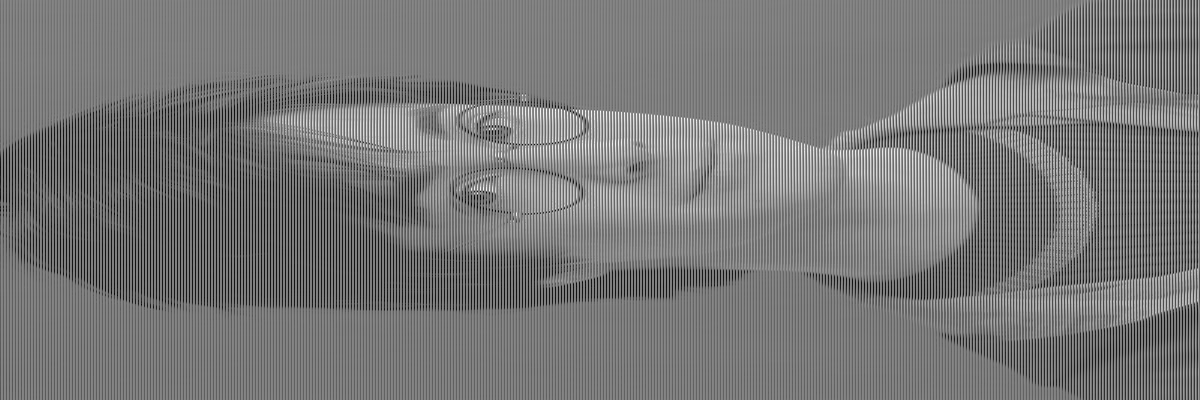



The image heigh is 400, and image width is 1200 pixels
Size of the sliced image: 7500
Each elemend of sliced list contains a (8, 8) element.


In [ ]:
image = cv.imread('harry.jpg')
imgYCC = cv.cvtColor(image, cv.COLOR_BGR2YCR_CB)
final_frame1 = cv.hconcat(( imgYCC))
cv2_imshow(final_frame1)
print('\n')

height  = len(final_frame1) #one column of image
width = len(final_frame1[0]) # one row of image
sliced = [] # new list for 8x8 sliced image 
block = 8
print("The image heigh is " +str(height)+", and image width is "+str(width)+" pixels")

currY = 0 #current Y index
for i in range(block,height+1,block):
    currX = 0 #current X index
    for j in range(block,width+1,block):
        sliced.append(final_frame1[currY:i,currX:j]-np.ones((8,8))*128) #Extracting 128 from all pixels
        currX = j
    currY = i
    
print("Size of the sliced image: "+str(len(sliced)))
print("Each elemend of sliced list contains a "+ str(sliced[0].shape)+ " element.")

In [ ]:
windowsize_r =8
windowsize_c =8

grey_levels = 64
# Generate a test image
# Crop out the window and calculate the histogram
for r in range(0,final_frame1.shape[0] - windowsize_r, windowsize_r):
    for c in range(0,final_frame1.shape[1] - windowsize_c, windowsize_c):
        window = final_frame1[r:r+windowsize_r,c:c+windowsize_c]
        hist = numpy.histogram(window,bins=grey_levels)

print(hist)


(array([ 6,  6, 10,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, 13, 11,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 16]), array([ 49.      ,  50.671875,  52.34375 ,  54.015625,  55.6875  ,
        57.359375,  59.03125 ,  60.703125,  62.375   ,  64.046875,
        65.71875 ,  67.390625,  69.0625  ,  70.734375,  72.40625 ,
        74.078125,  75.75    ,  77.421875,  79.09375 ,  80.765625,
        82.4375  ,  84.109375,  85.78125 ,  87.453125,  89.125   ,
        90.796875,  92.46875 ,  94.140625,  95.8125  ,  97.484375,
        99.15625 , 100.828125, 102.5     , 104.171875, 105.84375 ,
       107.515625, 109.1875  , 110.859375, 112.53125 , 114.203125,
       115.875   , 117.546875, 119.21875 , 120.890625, 122.5625  ,
       124.234375, 125.90625 , 127.578125, 129.25    , 130.921875,
       132.59375 , 134.265625, 135.9375  , 

In [ ]:
imf = [np.float32(img) for img in sliced]

In [ ]:
DCToutput = []
for part in imf:
    currDCT = cv2.dct(part)
    DCToutput.append(currDCT)
DCToutput[0][0]

array([-24.625   , -10.096125,  -5.073713, -13.335883,  -9.875   ,
       -67.04402 ,  12.249027,   6.746014], dtype=float32)

In [ ]:
def selectQMatrix(qName):
    Q10 = np.array([[80,60,50,80,120,200,255,255],
                [55,60,70,95,130,255,255,255],
                [70,65,80,120,200,255,255,255],
                [70,85,110,145,255,255,255,255],
                [90,110,185,255,255,255,255,255],
                [120,175,255,255,255,255,255,255],
                [245,255,255,255,255,255,255,255],
                [255,255,255,255,255,255,255,255]])

    Q50 = np.array([[16,11,10,16,24,40,51,61],
                [12,12,14,19,26,58,60,55],
                [14,13,16,24,40,57,69,56],
                [14,17,22,29,51,87,80,62],
                [18,22,37,56,68,109,103,77],
                [24,35,55,64,81,104,113,92],
                [49,64,78,87,103,121,120,101],
                [72,92,95,98,112,100,130,99]])

    Q90 = np.array([[3,2,2,3,5,8,10,12],
                    [2,2,3,4,5,12,12,11],
                    [3,3,3,5,8,11,14,11],
                    [3,3,4,6,10,17,16,12],
                    [4,4,7,11,14,22,21,15],
                    [5,7,11,13,16,12,23,18],
                    [10,13,16,17,21,24,24,21],
                    [14,18,19,20,22,20,20,20]])
    if qName == "Q10":
        return Q10
    elif qName == "Q50":
        return Q50
    elif qName == "Q90":
        return Q90
    else:
        return np.ones((8,8)) #it suppose to return original image back

In [ ]:
selectedQMatrix = selectQMatrix('Q10')
for ndct in DCToutput:
    for i in range(block):
        for j in range(block):
            ndct[i,j] = np.around(ndct[i,j]/selectedQMatrix[i,j])
DCToutput[0][0]


array([-0., -0., -0., -0., -0., -0.,  0.,  0.], dtype=float32)

In [ ]:
invList = []
for ipart in DCToutput:
    ipart
    curriDCT = cv2.idct(ipart)
    invList.append(curriDCT)
invList[0][0]

array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
import time
row = 0
rowNcol = []
start_time = time.time()

for j in range(int(width/block),len(invList)+1,int(width/block)):
    rowNcol.append(np.hstack((invList[row:j])))
    row = j
res = np.vstack((rowNcol))



end_time = time.time()


_time = end_time - start_time
print('Elapsed Time second')
print(_time)

Elapsed Time
0.009946346282958984


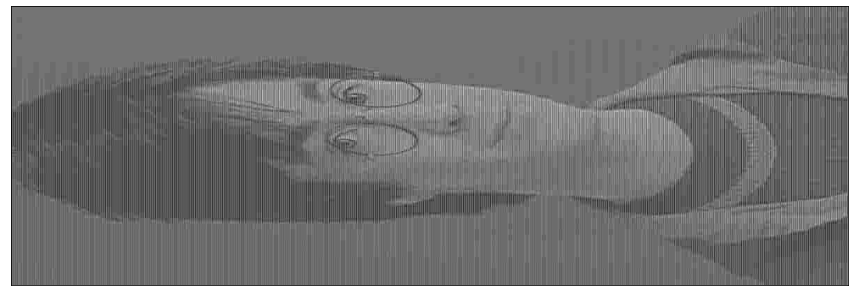

In [ ]:
import numpy                       # Fast math library
import time

showImage(res)




DCT:
 [[ 79   1   3  -2  -1   1   0   1]
 [-77   0   1  -1   0   0   1   1]
 [ 34  10  -2   0  -1   0   2   0]
 [  9   6  -1   0   0   0   2   0]
 [-15  -1   2  -2  -1   1   0   1]
 [ 13  -1   3  -2  -1   1  -1   1]
 [ 11   4  -1   0   0   0   1   0]
 [-18   5  -3   1   0  -1   2  -1]]


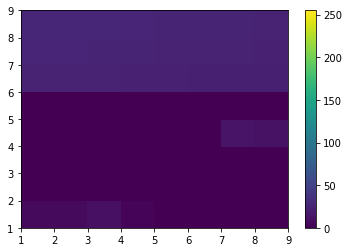

In [ ]:
import cv2
import numpy as np
import  sys
import matplotlib.pyplot as plt

file1='harry.jpg'

matrix = "[ [ 6,  6, 10,  2,  0,  0,  0,  0], [0,  0,  0,  0,  0,  0,  0,  0,], [0,  0,  0,  0,  0,  0,  0,  0], [ 0,  0,  0,  0,  0,  0, 13, 11], [0,  0,  0,  0,  0,  0,  0,  0 ], [24, 24, 24, 23, 23, 22, 22, 22], [26, 26, 25, 25, 24, 24, 24, 23], [27, 27, 27, 26, 25, 25, 25, 24]]"




block = eval(matrix)

#print ("Input:\n",block)

blockf = np.float32(block)  

dst = cv2.dct(blockf)  

print ("\nDCT:\n",np.int32(dst))
   


x = [1, 2, 3, 4, 5, 6,7,8,9]
y = [1, 2, 3, 4, 5, 6,7,8,9]

x, y = np.meshgrid(x, y)

plt.pcolormesh(x, y, block,vmin=0, vmax=255)
plt.colorbar() 
   
plt.show()

In [ ]:
pip install pycuda

     |████████████████████████████████| 1.6MB 6.1MB/s 
     |████████████████████████████████| 61kB 7.8MB/s 
     |████████████████████████████████| 81kB 9.7MB/s 
  Created wheel for pycuda: filename=pycuda-2019.1.2-cp36-cp36m-linux_x86_64.whl size=4537118 sha256=2a60353a13144494c85945a2d835e3bb321e5c0491bd6d60417e81243d585712
  Stored in directory: /root/.cache/pip/wheels/a6/60/f0/b1c430c73d281ac3e46070480db50f7907364eb6f6d3188396
  Created wheel for pytools: filename=pytools-2020.1-py2.py3-none-any.whl size=59602 sha256=379683b375aaa2b494aca1becf5044725c5020ca2a0b6f0d61e88011319ba665
  Stored in directory: /root/.cache/pip/wheels/6f/da/1b/946775a88291378182ed92c9800d6d0ebc2a554cb89829cc24
Successfully built pycuda pytools


In [ ]:


def selectQMatrix(qName):
    Q10 = np.array([[80,60,50,80,120,200,255,255],
                [55,60,70,95,130,255,255,255],
                [70,65,80,120,200,255,255,255],
                [70,85,110,145,255,255,255,255],
                [90,110,185,255,255,255,255,255],
                [120,175,255,255,255,255,255,255],
                [245,255,255,255,255,255,255,255],
                [255,255,255,255,255,255,255,255]])

    Q50 = np.array([[16,11,10,16,24,40,51,61],
                [12,12,14,19,26,58,60,55],
                [14,13,16,24,40,57,69,56],
                [14,17,22,29,51,87,80,62],
                [18,22,37,56,68,109,103,77],
                [24,35,55,64,81,104,113,92],
                [49,64,78,87,103,121,120,101],
                [72,92,95,98,112,100,130,99]])

    Q90 = np.array([[3,2,2,3,5,8,10,12],
                    [2,2,3,4,5,12,12,11],
                    [3,3,3,5,8,11,14,11],
                    [3,3,4,6,10,17,16,12],
                    [4,4,7,11,14,22,21,15],
                    [5,7,11,13,16,12,23,18],
                    [10,13,16,17,21,24,24,21],
                    [14,18,19,20,22,20,20,20]])
    if qName == "Q10":
        return Q10
    elif qName == "Q50":
        return Q50
    elif qName == "Q90":
        return Q90
    else:
        return np.ones((8,8)) #it suppose to return original image back
        

In [ ]:
import numpy as np

#img = np.array(Image.open(filename), dtype='uint8')

w, h = 5, 4 # width, height of image
bw, bh = 2, 3 # width, height of blocks

img = np.random.randint(2, size=(h, w)) # create a random binary image

# build a blocky view of the image data
sz = img.itemsize # size in bytes of the elements in img
shape = (h-bh+1, w-bw+1, bh, bw) # the shape of the new array: two indices for the blocks,
                                 # two indices for the content of each block
strides = (w*sz, sz, w*sz, sz) # information about how to map indices to image data
blocks = np.lib.stride_tricks.as_strided(img, shape=shape, strides=strides)

# now we can access the blocks
print (img)

print()
print (blocks[0,0])
print()

print (blocks[1,2])


[[1 0 1 0 1]
 [0 1 0 1 1]
 [1 0 0 0 1]
 [0 1 1 0 0]]

[[1 0]
 [0 1]
 [1 0]]

[[0 1]
 [0 0]
 [1 0]]


In [ ]:
!apt-get install -qq gcc-5 g++-5 -y
!ln -s /usr/bin/gcc-5 
!ln -s /usr/bin/g++-5 

!sudo apt-get update
!sudo apt-get upgrade

#Install Dependencies
!sudo apt-get install -y build-essential 
!sudo apt-get install -y cmake git libgtk2.0-dev pkg-config libavcodec-dev libavformat-dev libswscale-dev
#The following command is needed to process images:
!sudo apt-get install -y python-dev python-numpy libtbb2 libtbb-dev libjpeg-dev libpng-dev libtiff-dev libjasper-dev libdc1394-22-dev
#To process videos:
!sudo apt-get install -y libavcodec-dev libavformat-dev libswscale-dev libv4l-dev
!sudo apt-get install -y libxvidcore-dev libx264-dev
#For GUI:
!sudo apt-get install -y libgtk-3-dev
#For optimization:
!sudo apt-get install -y libatlas-base-dev gfortran pylint
!wget https://github.com/opencv/opencv/archive/3.4.0.zip -O opencv-3.4.0.zip
!sudo apt-get install unzip
!unzip opencv-3.4.0.zip
%cd opencv-3.4.0
!mkdir build
%cd build
!cmake -D WITH_TBB=ON -D WITH_OPENMP=ON -D WITH_IPP=ON -D CMAKE_BUILD_TYPE=RELEASE -D BUILD_EXAMPLES=OFF -D WITH_NVCUVID=ON -D WITH_CUDA=OFF -D BUILD_DOCS=OFF -D BUILD_PERF_TESTS=OFF -D BUILD_TESTS=OFF -D WITH_CSTRIPES=ON -D WITH_OPENCL=ON CMAKE_INSTALL_PREFIX=/usr/local/ ..
!make -j`nproc`
!sudo make install


In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2

# Load in Grayscale
img = cv2.imread('harry.jpg', 0)

# The underlying representation is a numpy array!
print(type(img))

plt.imshow(img)
plt.show()

img = cv2.imread('harry.jpg')

plt.imshow(img)
plt.show()

# This would work normally, but it will crash the colab kernel, so don't.
# cv2.imshow('Image', img)

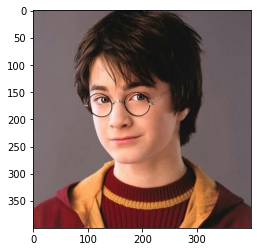

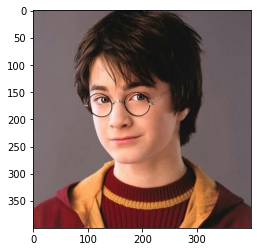

In [ ]:
imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(imgrgb)
plt.show()

# Or, use fun numpy functions / indexing!
imgrgb = img[:,:,::-1]
plt.imshow(imgrgb)
plt.show()


In [ ]:
%matplotlib inline
import numpy as np
import numpy as numpy
import cv2
import matplotlib.pyplot as plt


image = cv2.imread('harry.jpg')
block_img = np.zeros(image.shape)
im_h, im_w = image.shape[:2]
bl_h, bl_w = 8, 8

for row in np.arange(im_h - bl_h + 1, step=bl_h):
    for col in np.arange(im_w - bl_w + 1, step=bl_w):
        block_img[row:row+bl_h, col:col+bl_w] = plt.hist(image[row:row+bl_h, col:col+bl_w])
      

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


IndentationError: ignored

In [ ]:
!apt install octave

In [ ]:
%%cu
#include <opencv/cv.h>
#include <opencv/highgui.h>
#include <iostream>

using namespace cv; 

int main(int argc, char** argv){
    Mat image;
    Mat grayImage; 

    if(!argv[1]){
        std::cerr << "No image data!" << std::endl;
        return -1; 
    }

    image = imread(argv[1], 1);
    cvtColor(image, grayImage, CV_BGR2GRAY);
    imwrite("Gray_Image.jpg", grayImage);

    namedWindow(argv[1], CV_WINDOW_AUTOSIZE);
    namedWindow("Gray Image", CV_WINDOW_AUTOSIZE);

    imshow(argv[1], image);
    imshow("Gray Image", grayImage);

    waitKey(0);
    return 0;
}

/tmp/tmpu1t1p7aw/5472f643-268a-4129-976b-6e3a3c1218a2.cu(16): error: identifier "imread" is undefined

/tmp/tmpu1t1p7aw/5472f643-268a-4129-976b-6e3a3c1218a2.cu(17): error: identifier "cvtColor" is undefined

/tmp/tmpu1t1p7aw/5472f643-268a-4129-976b-6e3a3c1218a2.cu(18): error: identifier "imwrite" is undefined

/tmp/tmpu1t1p7aw/5472f643-268a-4129-976b-6e3a3c1218a2.cu(20): error: identifier "namedWindow" is undefined

/tmp/tmpu1t1p7aw/5472f643-268a-4129-976b-6e3a3c1218a2.cu(23): error: identifier "imshow" is undefined

/tmp/tmpu1t1p7aw/5472f643-268a-4129-976b-6e3a3c1218a2.cu(26): error: identifier "waitKey" is undefined

6 errors detected in the compilation of "/tmp/tmpxft_0000018d_00000000-8_5472f643-268a-4129-976b-6e3a3c1218a2.cpp1.ii".



In [ ]:
pip install opencv-python

In [ ]:
pip install -U git+git://github.com/lilohuang/PyTurboJPEG.git

  Cloning git://github.com/lilohuang/PyTurboJPEG.git to /tmp/pip-req-build-eqfo5mby
  Running command git clone -q git://github.com/lilohuang/PyTurboJPEG.git /tmp/pip-req-build-eqfo5mby
  Created wheel for PyTurboJPEG: filename=PyTurboJPEG-1.4.0-cp36-none-any.whl size=7788 sha256=1dfa155b950b569cc2192e17b2d060a8d780ebc911c9a76838295ab4a14921c9
  Stored in directory: /tmp/pip-ephem-wheel-cache-kye17_ou/wheels/26/1e/1f/a7f25b588d54e15cd1373c1e86be0bca14e058b90743793de3
Successfully built PyTurboJPEG


In [ ]:
pip install opencv-python

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
!pip install git+git://github.com/andreinechaev/nvcc4jupyter.git

  Cloning git://github.com/andreinechaev/nvcc4jupyter.git to /tmp/pip-req-build-gcayay8n
  Running command git clone -q git://github.com/andreinechaev/nvcc4jupyter.git /tmp/pip-req-build-gcayay8n
  Created wheel for NVCCPlugin: filename=NVCCPlugin-0.0.2-cp36-none-any.whl size=4307 sha256=6e71aeb63cc95f843f7711583ff7bd8f5d2b0ced5c2398556a363fc733b0f9e2
  Stored in directory: /tmp/pip-ephem-wheel-cache-06sb_96e/wheels/10/c2/05/ca241da37bff77d60d31a9174f988109c61ba989e4d4650516
Successfully built NVCCPlugin


In [ ]:
%load_ext nvcc_plugin

created output directory at /content/src
Out bin /content/result.out


//Bu kodun çalışması için yukarıdaki ^
//1.!pip install git+git://github.com/andreinechaev/nvcc4jupyter.git
//2.%load_ext nvcc_plugin
//coları run edilmelidir.

In [ ]:
%%cu
#include<bits/stdc++.h>
#include <stdio.h>
#include <stdlib.h>
#include<time.h>
#include <fstream>
#include <cstring>
#include <vector>
#include<iostream>
#include <map>
#include <string>
#include <fstream>
#include <streambuf>
#include <iostream>
#define AF_VERSION 310
#if AF_VERSION >= 310
#endif
void YUVfromRGB(double& Y, double& U, double& V, const double R, const double G, const double B)
{
  Y =  0.257 * R + 0.504 * G + 0.098 * B +  16;
  U = -0.148 * R - 0.291 * G + 0.439 * B + 128;
  V =  0.439 * R - 0.368 * G - 0.071 * B + 128;
}
void RGBfromYUV(double& R, double& G, double& B, double Y, double U, double V)
{
  Y -= 16;
  U -= 128;
  V -= 128;
  R = 1.164 * Y             + 1.596 * V;
  G = 1.164 * Y - 0.392 * U - 0.813 * V;
  B = 1.164 * Y + 2.017 * U;
}
int main(){
    
    
}

In [ ]:
%%cu
#include<bits/stdc++.h>
#include <stdio.h>
#include <stdlib.h>
#include<time.h>
#include <fstream>
#include <cstring>
#include <vector>
#include<iostream>
#include <map>
#include <string>
#include <fstream>
#include <streambuf>
#include <iostream>

// Load img
cv::Mat bgrImg = imread( "BLK.BMP", cv::IMREAD_COLOR );
assert( bgrImg.data && "No image data");

// Declare an empty Mat for dst image
cv::Mat ycrcbImg;

// Convert to ycrcb
cv::cvtColor(bgrImg, ycrcbImg, cv::COLOR_BGR2YCrCb);

// Split bgr into 3 channels
cv::Mat bgrChan[3];
cv::split(bgrImg, bgrChan);

// Split ycrcb into 3 channels
cv::Mat ycrcbChan[3];
cv::split(ycrcbImg, ycrcbChan);

// Print first block for each channel
PRINT_MAT(ycrcbChan[0](cv::Rect(0, 0, 8, 8)), "LUMA (first 8x8 block)");
PRINT_MAT(ycrcbChan[1](cv::Rect(0, 0, 8, 8)), "Cr (first 8x8 block)");
PRINT_MAT(ycrcbChan[2](cv::Rect(0, 0, 8, 8)), "Cb (first 8x8 block)");

PRINT_MAT(bgrChan[0](cv::Rect(0, 0, 8, 8)), "Blue (first 8x8 block)");
PRINT_MAT(bgrChan[1](cv::Rect(0, 0, 8, 8)), "Green (first 8x8 block)");
PRINT_MAT(bgrChan[2](cv::Rect(0, 0, 8, 8)), "Red (first 8x8 block)");

In [ ]:
%%cu
%matplotlib inline
#include<iostream>

using namespace std;
using namespace cv;

int main()
{
    cv::Mat M(102,201,CV_8UC1);
    int rows = M.rows;
    int cols = M.cols;

    cout<<rows<<" "<<cols<<endl;

    cv::Size sz = M.size();
    rows = sz.height;
    cols = sz.width;

    cout<<rows<<" "<<cols<<endl;
    cout<<sz<<endl;
    return 0;
}

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [ ]:
%%cu
#include<bits/stdc++.h>
#include <stdlib.h>
#include<time.h>
#include <fstream>
#include <cstring>
#include <omp.h> 
#include <memory>
#include<list>
#pragma redefine_extname __impl_load __atomic_load
//temp holds an compressed value inside.
using namespace std;
FILE *yaz;
FILE *fp;
     
     FILE *ptr;
     string temp;
     char ch ;
     char *strx = (char *) malloc((2900 * 100000* sizeof(char)) );
     int i=0;
     int j=0;
     clock_t start_t ;
     clock_t finish ;
     clock_t start_tdec ;
     clock_t finish_dec;

        string text = "";
        string nextChar = "";
        int pointer = 0;
        //List<string> dic = new List<string>();//dictionary 
        std::list<string> dic;
             void decomp(string text1)
            {
                text = text1 ;
                string* CompRslt ;
               
               
                for (int i = 0; i < text1.length; i += 2)
                {

                    if (CompRslt[i].length == 0)
                        break;
                    
                  
                
                   nextChar = CompRslt[i + 1];
                   
             
                    if (nextChar != "null")
                      text1   += dic[pointer] + nextChar;
                    else
                        text1 += dic[pointer];

                    pointer = 0;
                    nextChar = "";

                }
             fprintf(ptr,"%s\n", dic);

            }





    void lz78()
    {
   
   string str(strx);//char arrayimi stringe dönüştürüyor bu özel fonksiyon str de dosya içini string olarak tutuyor.



 
    map<string,int> hm;
    int k=1;
    #pragma omp parallel shared(temp) private(i) 
   {
   	#pragma omp sections nowait
   	{
	  #pragma omp for schedule (static str) 
    for(int i=0;i<str.length();i++)
    {
    	#pragma omp atomic update
        temp=temp+""+str[i];
        if(temp.length()==1&&hm.find(temp)==hm.end())
        {
        
            hm[temp]=k++;
            fprintf(yaz,"<0, %c >",temp.at(0));
          
              
          
            temp="";
        }
        else if(hm.find(temp)==hm.end())
        {
            string already_pres = temp.substr(0,temp.length()-1);
            hm[temp]=k++;
           fprintf(yaz,"<%d , %c>",hm[already_pres] ,temp[temp.length()-1]);  
           
            temp="";
        }
    }
    if(temp.length() != 0)
    {
        string already_pres = temp.substr(0,temp.length()-1);
        hm[temp]=k++;
       
        fprintf(yaz,"<%d , %c >",hm[already_pres] ,temp[temp.length()-1]);
         
		 
    }
     
     
}
}
}

int main()
{
      
     
     char *mystrx;
     fp = fopen("41.txt.txt", "r");
     
    
      while((ch = fgetc(fp)) != EOF)
      strx[i++]=ch;
	 
     yaz=fopen("ol.txt","w");
     start_t=clock();  
     lz78();
     finish=clock();
     fclose(yaz);


     ptr = fopen("ol.txt", "r");
 
    
      while((ch = fgetc(ptr)) != EOF)
      mystrx[j++]=ch;
      
      std::string x(mystrx);


     start_tdec=clock();  
     decomp(x);
     finish_dec=clock();
   
    
   
     fclose(fp);
    
    
     cout << "Time Elapsed: for compress operation " << (finish- start_t) << "  milliseconds with OPENMP  "<< endl;
     cout << "Time Elapsed: for decompress operation " << (finish_dec- start_tdec) << " milliseconds with OPENMP  "<< endl;

     

}

/tmp/tmpg3t1_9z0/463fab31-59e1-45e3-8b3a-40e390b0b7fd.cu(37): error: a pointer to a bound function may only be used to call the function

/tmp/tmpg3t1_9z0/463fab31-59e1-45e3-8b3a-40e390b0b7fd.cu(40): error: a pointer to a bound function may only be used to call the function

/tmp/tmpg3t1_9z0/463fab31-59e1-45e3-8b3a-40e390b0b7fd.cu(49): error: no operator "[]" matches these operands
            operand types are: std::__cxx11::list<std::__cxx11::string, std::allocator<std::__cxx11::string>> [ int ]

/tmp/tmpg3t1_9z0/463fab31-59e1-45e3-8b3a-40e390b0b7fd.cu(51): error: no operator "[]" matches these operands
            operand types are: std::__cxx11::list<std::__cxx11::string, std::allocator<std::__cxx11::string>> [ int ]

/tmp/tmpg3t1_9z0/463fab31-59e1-45e3-8b3a-40e390b0b7fd.cu(57): warning: non-POD class type passed through ellipsis

4 errors detected in the compilation of "/tmp/tmpxft_00000162_00000000-8_463fab31-59e1-45e3-8b3a-40e390b0b7fd.cpp1.ii".



In [ ]:
%%cu
#include<bits/stdc++.h>
#include <stdlib.h>
#include<time.h>
#include <fstream>
#include <cstring>
#include <vector>
#include<iostream>
using namespace std;

     FILE *fp;
     FILE *yaz;
     string temp;
     static  int i;
     char ch, file_name[25];
	 
  char *strx = (char *) malloc((2900 * 100000* sizeof(char)) );
     clock_t start_t ;
     clock_t finish ;
    
     
    void lz78()
    {
  
   std::string str(strx);

 
    map<string,int> hm;
    int k=1;
    for(int i=0;i<str.length();i++)
    {
        temp=temp+""+ *(strx+i);
        if(temp.length()==1&&hm.find(temp)==hm.end())
        {
        
            hm[temp]=k++;
            fprintf(yaz,"<0, %c >",temp.at(0));
            
              
          
            temp="";
        }
        else if(hm.find(temp)==hm.end())
        {
            string already_pres = temp.substr(0,temp.length()-1);
            hm[temp]=k++;
            
            fprintf(yaz,"<%d , %c>",hm[already_pres] ,temp[temp.length()-1]);  
           
            temp="";
        }
    }
    if(temp.length() != 0)
    {
        string already_pres = temp.substr(0,temp.length()-1);
        hm[temp]=k++;
        //cout<<"<"<<hm[already_pres]<<","<<temp[temp.length()-1]<<">"<<endl;
        fprintf(yaz,"<%d , %c >",hm[already_pres] ,temp[temp.length()-1]);
         
		 
    }
     
     
}


int main()
{
    
     i=0;
   
   fp = fopen("sddd.txt", "r");
   if (fp == NULL)
   {
      perror("Error while opening the file.\n");
      exit(EXIT_FAILURE);
   }
     else
     {
      while((ch = fgetc(fp)) != EOF)
      strx[i++]=ch;
	 }
     yaz=fopen("ol.txt","w");
     start_t=clock();
     lz78();
     finish=clock();
     
     
     fclose(yaz);
     fclose(fp);
    
    
     cout << "Time Elapsed:  " << finish- start_t << " miliseconds with a SERIAL way "<< endl;
        }


Time Elapsed:  68 seconds with a SERIAL way 



In [ ]:
!nvidia-smi

Sat Mar 28 11:08:40 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [ ]:
%%cu
#include<bits/stdc++.h>
#include <stdio.h>
#include <stdlib.h>
#include<time.h>
#include <fstream>
#include <cstring>
#include <vector>
#include<iostream>
#include <map>
#include <string>
#include <fstream>
#include <streambuf>
#include <iostream>
#define N 20

using namespace std;

FILE *fp;
#define gpuErrchk(ans) { gpuAssert((ans), __FILE__, __LINE__); }
inline void gpuAssert(cudaError_t code, const char *file, int line, bool abort=true)
{
   if (code != cudaSuccess) 
   {
      fprintf(stderr,"GPUassert: %s %s %d\n", cudaGetErrorString(code), file, line);
      if (abort) exit(code);
   }
}

__host__  __device__   void y(char *strx){//burada strx sub araryim
  std::string str(strx);

  string temp;

  map<string,int> hm;

  int k=1;
  for(int i=0; i< str.length(); i++){
      temp=temp+""+*(strx+i);

   if(temp.length()==1&&hm.find(temp)==hm.end())
        {
            hm[temp]=k++;
            printf("<0,%c" ,temp , ">\n");
            temp="";
        }
        else if(hm.find(temp)==hm.end())
        {
            string already_pres = temp.substr(0,temp.length()-1);
            hm[temp]=k++;
            printf("< %d " ,hm[already_pres] , " %c " ,temp[temp.length()-1] ," >\n");
            
            temp="";
        }

       
  }

  if(temp.length() != 0)
    {
        string already_pres = temp.substr(0,temp.length()-1);
        hm[temp]=k++;
        printf("<%d ",hm[already_pres] , ", %c " ,temp[temp.length()-1]  ,">");
    }

}
  __device__ void x(char * uncompressed){
    //call y
     int index= threadIdx.x+blockIdx.x*blockDim.x;
     int size = sizeof(uncompressed) / sizeof(uncompressed[0]); 
     int subsize=10;
     char *subarray;
     
     if(index<size){
         
     while(subsize<size){
    
for ( int binIdx = threadIdx.x; binIdx < subsize; binIdx++) {
             subarray[binIdx] = uncompressed[binIdx];
      }
               __syncthreads(); 
                  y(subarray);
                  
                  subsize+=subsize;
     }

}
}
__global__ void method(char *arr){
             x(arr);
             }


 
  /* __host__ char* eli(){
        char *h_a;
        std::ifstream file("/content/comp4.txt");
        std::string h_astring((std::istreambuf_iterator<char>(file)),
                        std::istreambuf_iterator<char>());
  
     strcpy(h_a, h_astring.c_str());
     return h_a;
    }
*/
char* load_file(char const* path)
{
    char* buffer = 0;
    long length;
    FILE * f = fopen (path, "r"); //was "rb"

    if (f)
    {
      fseek (f, 0, SEEK_END);
      length = ftell (f);
      fseek (f, 0, SEEK_SET);
      buffer = (char*)malloc ((length+1)*sizeof(char));
      if (buffer)
      {
        fread (buffer, sizeof(char), length, f);
      }
      fclose (f);
    }
    buffer[length] = '\0';
    // for (int i = 0; i < length; i++) {
    //     printf("buffer[%d] == %c\n", i, buffer[i]);
    // }
    //printf("buffer = %s\n", buffer);

    return buffer;
}
int main(){
char *h_a;//Host array
float total_elapsed_coeffs=0.0;
char *d_a;//Device array
int i;
char *buffer;
h_a = (char*)malloc( 50 * sizeof(char) );

/* do your work here, buffer is a string contains the whole text */

cudaMalloc(&d_a, sizeof(char));
cudaMemcpy(d_a, h_a, sizeof(char), cudaMemcpyHostToDevice);

d_a=load_file("/content/comp4.txt");   
cudaEvent_t start, stop;
float gpu_time = 0.0f;
 cudaEventCreate(&start) ;
cudaEventCreate(&stop) ;
cudaEventRecord(start, 0);
method <<<4,4>>>(d_a); 
cudaDeviceSynchronize();
cudaThreadSynchronize();
cudaEventRecord(stop, 0);
cudaEventSynchronize(stop);
 cudaEventElapsedTime(&gpu_time, start, stop) ;
printf("Time spent: %f\n", total_elapsed_coeffs);
cudaEventDestroy(start);
cudaEventDestroy(stop);

// Copy array back to host
cudaMemcpy(h_a, d_a, sizeof(char), cudaMemcpyDeviceToHost);

// Release device memory
cudaFree(d_a);
free(h_a);

fclose(fp);
free(buffer);
  


}
     



In [ ]:
import cv2 

In [ ]:
%%cu
#include <bits/stdc++.h>
#include <list>
#include <bitset>
#include <iostream>
#include <fstream>
#include <string>
#include <algorithm>
#include <queue>
#include<omp.h>
#include<time.h>

using namespace std;

string encode_int(int in)
{
  return bitset<8>(in).to_string();
}

int decode_int(char out)
{
  return bitset<8>(out).to_ulong();
}

string encode_char(string in)
{
  return bitset<8>(in[0]).to_string();
}

char decode_char(string out)
{
  return (char)bitset<8>(out).to_ulong();
}

struct Dict
{
  string label; // dictionary entry string
  char output;  // first non-matching symbol
  int entry;    // longest matching dictionary entry

  Dict(string label, int entry, char output) // constructor
  {
    this->label = label;
    this->entry = entry;
    this->output = output;
  }
};

int find(string l, list<Dict> enc_list)
{ // change list to map

  list<Dict> temp = enc_list;
  int i = 1;

  while(!temp.empty())
  {
      if(!(l.compare(temp.front().label)))
      {
          return i;
      }
      temp.pop_front();
      i++;
  }
  return -1;
}

void write_file(string input, string output_filename)
{
  string one_byte;
  unsigned long bin_number;
  unsigned char chr;
  int i, len = input.length();

  FILE *fp;
  fp = fopen(output_filename.c_str(), "wb");

  if(fp == NULL)
  {
    printf("Unable to open output file!\n");
    return;
  }
 
 #pragma omp parallel  private(i) 
  for (i=0; i<len; i+= 8)
  {
    one_byte = input.substr(i, 8);
    bin_number = strtol(one_byte.c_str(), NULL, 2);

    chr = bin_number;
    fprintf(fp, "%c", bin_number);
  }

  fclose(fp);
}

void LZ78_Compress(string txt, string output_filename)
{
  list <Dict> Dictionary;
  string Prefix = "", Char, compressed;

  int CodeWord, IndexForPrefix = 1, len, i;

  len = txt.length();

  #pragma omp parallel  private(i)  
  for(i=0; i<len; i++){

     Char = string(1, txt[i]);

     IndexForPrefix = find((Prefix + Char), Dictionary);  // if it equals to -1, it means (Prefix + Char) is not in the dictionary
     if(IndexForPrefix != -1)
     {    
         Prefix = Prefix + Char; // if  Prefix + Char already exists, append Char
     }

     else
     {
        if(Prefix.empty())
        {
          CodeWord = 0;           // if Prefix is empty, a new letter was processed
          compressed += "00000000";
        }
        else
        {
          CodeWord = find(Prefix, Dictionary);     // search Prefix index
          compressed += encode_int(CodeWord);       // encode index
        }

        compressed += encode_char(Char);                                // encode char
        Dictionary.push_back(Dict((Prefix + Char), CodeWord, txt[i])); // add new entry to the dictionary
        Prefix.clear();      
     }
  } 

  write_file(compressed, output_filename);
}

void LZ78_Decompress(string input_filename, string output_filename)
{
  // Decompression Variables
  string dict = "";
  string decompressed_text;      // the the decomressed string
  string compressed_text;        // the compressed input
  string character;              // the character immediately after the current codeword
  string temp;                   

  unsigned char ch;
  unsigned int codeword, l = 0, i, len;           // the current dictionary entry being processed

  FILE *fp;
  fp = fopen(input_filename.c_str(), "rb");

  if(fp == NULL)
  {
    printf("Unable to open compressed file!\n");
    return;
  }

 
  while(fscanf(fp, "%c", &ch) == 1)
  {
    compressed_text += ch;
  }
  len = compressed_text.length();

  fclose(fp);


ofstream outfile(output_filename.c_str(), ios::binary);

  int *idx = new int[len]; // used for storing the index of the i-th dictionary entry
  #pragma omp parallel  private(i)
  for (i=0;i<len;i+=2)
  {
    codeword = compressed_text[i];                      // longest matching dictionary entry
    character = compressed_text.substr(i + 1, 1);       // first non-matching symbol
    dict += character;                           
    idx[l] = codeword;
    l++; // idx size

    // let's say l = 0
    // then (idx[0], dict[0]) represents the first dictionary entry

    if(codeword == 0)
    {
        decompressed_text += character; // new letter, just append
    }

    else
    {      
       while(codeword > 0)  // go back in the dictionary string, adding each letter until you get one with codeword = 0
       {
        temp += dict[codeword-1];
        codeword = idx[codeword-1];
       }
       reverse(temp.begin(), temp.end()); // restore correct order
       decompressed_text += temp;         // append string and char
       decompressed_text += character;
       temp.clear();
    }
  }
  outfile << decompressed_text;
  outfile.close();
}


void Compress(string input_filename, string output_filename)
{
  ifstream in(input_filename.c_str());
  string line, txt;

  while(getline(in, line))
  {
    txt += line;
    txt += "\n";
  }
  in.close();

  LZ78_Compress(txt, output_filename);
}

int main()
{
    
    
     clock_t start_t ;
     clock_t finish ,finish_d,start_td;
     start_t=clock();
     Compress("comp4.txt", "compressed.txt");
     finish=clock();


     start_td=clock();
     LZ78_Decompress("compressed.txt", "Decompressed.txt");
     finish_d=clock();
 

     cout << "Compression Time Elapsed:    " << finish- start_t << " seconds with a OpenMP way "<< endl;
 
     cout << "Decompression Time Elapsed:  " << finish_d- start_td << " seconds with a OpenMP way "<< endl;


}

Compression Time Elapsed:    87 seconds with a OpenMP way 
Decompression Time Elapsed:  77 seconds with a OpenMP way 



In [ ]:
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import cv2

In [ ]:
%%cu
#include <iostream>
#include <stdio.h>
#include <opencv2/opencv.hpp>
#include <opencv2/core/core.hpp>
#include <opencv2/highgui/highgui.hpp>
#include <iostream>

#include <opencv2/imgproc/imgproc.hpp>

using namespace std;
using namespace cv;

#ifndef _CUDA_Histogram_
#define _CUDA_Histogram_

void Histogram_Calculation_CUDA(unsigned char* Image, int Height, int Width, int Channels, int* Histogram_Blue, int* Histogram_Green, int* Histogram_Red);

#endif

__global__ void Histogram_CUDA(unsigned char* Image, int Channels, int* Histogram_Blue, int* Histogram_Green, int* Histogram_Red);

void Histogram_Calculation_CUDA(unsigned char* Image, int Height, int Width, int Channels, int* Histogram_Blue, int* Histogram_Green, int* Histogram_Red){
	unsigned char* Dev_Image = NULL;
	int* Dev_Histogram_Blue = NULL;
	int* Dev_Histogram_Green = NULL;
	int* Dev_Histogram_Red = NULL;

	//allocate cuda variable memory
	cudaMalloc((void**)&Dev_Image, Height * Width * Channels);
	cudaMalloc((void**)&Dev_Histogram_Blue, 256 * sizeof(int));
	cudaMalloc((void**)&Dev_Histogram_Green, 256 * sizeof(int));
	cudaMalloc((void**)&Dev_Histogram_Red, 256 * sizeof(int));

	//copy CPU data to GPU
	cudaMemcpy(Dev_Image, Image, Height * Width * Channels, cudaMemcpyHostToDevice);
	cudaMemcpy(Dev_Histogram_Blue, Histogram_Blue, 256 * sizeof(int), cudaMemcpyHostToDevice);
	cudaMemcpy(Dev_Histogram_Green, Histogram_Green, 256 * sizeof(int), cudaMemcpyHostToDevice);
	cudaMemcpy(Dev_Histogram_Red, Histogram_Red, 256 * sizeof(int), cudaMemcpyHostToDevice);

	dim3 Grid_Image(Width, Height);
	Histogram_CUDA << <Grid_Image, 1 >> >(Dev_Image, Channels, Dev_Histogram_Blue, Dev_Histogram_Green, Dev_Histogram_Red);

	//copy memory back to CPU from GPU
	cudaMemcpy(Histogram_Blue, Dev_Histogram_Blue, 256 * sizeof(int), cudaMemcpyDeviceToHost);
	cudaMemcpy(Histogram_Green, Dev_Histogram_Green, 256 * sizeof(int), cudaMemcpyDeviceToHost);
	cudaMemcpy(Histogram_Red, Dev_Histogram_Red, 256 * sizeof(int), cudaMemcpyDeviceToHost);
	
	//free up the memory of GPU
	cudaFree(Dev_Histogram_Blue);
	cudaFree(Dev_Histogram_Green);
	cudaFree(Dev_Histogram_Red);
	cudaFree(Dev_Image);
}

__global__ void Histogram_CUDA(unsigned char* Image, int Channels, int* Histogram_Blue, int* Histogram_Green, int* Histogram_Red){
	int x = blockIdx.x;
	int y = blockIdx.y;

	int Image_Idx = (x + y * gridDim.x) * Channels;

	atomicAdd(&Histogram_Blue[Image[Image_Idx]], 1);
	atomicAdd(&Histogram_Green[Image[Image_Idx + 1]], 1);
	atomicAdd(&Histogram_Red[Image[Image_Idx + 2]], 1);
}


int main(){

	Mat Input_Image = imread("Test_Image.png"); // Read Color Image

	cout << "Image Height: " << Input_Image.rows << ", Image Width: " << Input_Image.cols << ", Image Channels: " << Input_Image.channels() << endl;

	int Histogram_Blue[256] = { 0 };
	int Histogram_Green[256] = { 0 };
	int Histogram_Red[256] = { 0 };

	Histogram_Calculation_CUDA(Input_Image.data, Input_Image.rows, Input_Image.cols, Input_Image.channels(), Histogram_Blue, Histogram_Green, Histogram_Red);

	cv::imwrite("Histogram_Image.png", Input_Image);

for (int i = 0; i < 256; i++){
		cout << "Histogram_Blue[" << i << "]: " << Histogram_Blue[i] << endl;
		cout << "Histogram_Green[" << i << "]: " << Histogram_Green[i] << endl;
		cout << "Histogram_Red[" << i << "]: " << Histogram_Red[i] << endl;
	}
return 0;
}

/tmp/tmpxft_0000030e_00000000-10_0737287f-80d8-4a14-b659-bae731a64f51.o: In function `main':
tmpxft_0000030e_00000000-5_0737287f-80d8-4a14-b659-bae731a64f51.cudafe1.cpp:(.text+0x287): undefined reference to `cv::imread(cv::String const&, int)'
tmpxft_0000030e_00000000-5_0737287f-80d8-4a14-b659-bae731a64f51.cudafe1.cpp:(.text+0x415): undefined reference to `cv::imwrite(cv::String const&, cv::_InputArray const&, std::vector<int, std::allocator<int> > const&)'
/tmp/tmpxft_0000030e_00000000-10_0737287f-80d8-4a14-b659-bae731a64f51.o: In function `cv::String::String(char const*)':
tmpxft_0000030e_00000000-5_0737287f-80d8-4a14-b659-bae731a64f51.cudafe1.cpp:(.text._ZN2cv6StringC2EPKc[_ZN2cv6StringC5EPKc]+0x4d): undefined reference to `cv::String::allocate(unsigned long)'
/tmp/tmpxft_0000030e_00000000-10_0737287f-80d8-4a14-b659-bae731a64f51.o: In function `cv::String::~String()':
tmpxft_0000030e_00000000-5_0737287f-80d8-4a14-b659-bae731a64f51.cudafe1.cpp:(.text._ZN2cv6StringD2Ev[_ZN2cv6StringD5

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

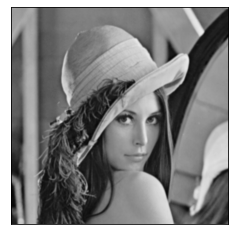

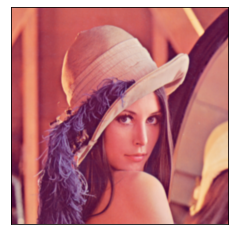

In [ ]:
img = cv.imread('Test_Image.png',0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
img = cv.imread('Test_Image.png',1)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img, interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [ ]:
%%cu
#include <thrust/host_vector.h>
#include <thrust/device_vector.h>

using namespace thrust;

int main()
{
    int height = 5, width = 5;
    device_vector<int> d_ndata(height*width);
    d_ndata(2)=5;
    return 0;
}

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

ERROR! Session/line number was not unique in database. History logging moved to new session 59


'/device:GPU:0'

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4404149873072793720, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 1608891385390752795
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 4788968123300582659
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15956161332
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 2315230981491913928
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [ ]:
%%cu
#include <iostream>
#include <cstdio>
#pragma hd_warning_disable
using namespace std;
template<class Function>
__host__ __device__
void invoke(Function f)
{
  f();
}
struct host_only
{
  __host__
  void operator()()
  {
    cout << "host_only()" << std::endl;
  }

};

In [ ]:

%%cu
#include <thrust/host_vector.h>
#include <thrust/device_vector.h>
#include <thrust/system/cuda/experimental/pinned_allocator.h>
#include <thrust/system/cuda/execution_policy.h>
#include <thrust/fill.h>
#include <thrust/sequence.h>
#include <thrust/for_each.h>
#include <iostream>

// DSIZE determines duration of H2D and D2H transfers
#define DSIZE (1048576*8)
// SSIZE,LSIZE determine duration of kernel launched by thrust
#define SSIZE (1024*512)
#define LSIZE 1
// KSIZE determines size of thrust kernels (number of threads per block)
#define KSIZE 64
#define TV1 1
#define TV2 2

typedef int mytype;
typedef thrust::host_vector<mytype, thrust::cuda::experimental::pinned_allocator<mytype> > pinnedVector;

struct sum_functor
{
  mytype *dptr;
  sum_functor(mytype* _dptr) : dptr(_dptr) {};
  __host__ __device__ void operator()(mytype &data) const
    {
      mytype result = data;
      for (int j = 0; j < LSIZE; j++)
        for (int i = 0; i < SSIZE; i++)
          result += dptr[i];
      data = result;
    }
};

int main(){

  pinnedVector hi1(DSIZE);
  pinnedVector hi2(DSIZE);
  pinnedVector ho1(DSIZE);
  pinnedVector ho2(DSIZE);
  thrust::device_vector<mytype> di1(DSIZE);
  thrust::device_vector<mytype> di2(DSIZE);
  thrust::device_vector<mytype> do1(DSIZE);
  thrust::device_vector<mytype> do2(DSIZE);
  thrust::device_vector<mytype> dc1(KSIZE);
  thrust::device_vector<mytype> dc2(KSIZE);

  thrust::fill(hi1.begin(), hi1.end(),  TV1);
  thrust::fill(hi2.begin(), hi2.end(),  TV2);
  thrust::sequence(do1.begin(), do1.end());
  thrust::sequence(do2.begin(), do2.end());

  cudaStream_t s1, s2;
  cudaStreamCreate(&s1); cudaStreamCreate(&s2);

  cudaMemcpyAsync(thrust::raw_pointer_cast(di1.data()), thrust::raw_pointer_cast(hi1.data()), di1.size()*sizeof(mytype), cudaMemcpyHostToDevice, s1);
  cudaMemcpyAsync(thrust::raw_pointer_cast(di2.data()), thrust::raw_pointer_cast(hi2.data()), di2.size()*sizeof(mytype), cudaMemcpyHostToDevice, s2);

  thrust::for_each(thrust::cuda::par.on(s1), do1.begin(), do1.begin()+KSIZE, sum_functor(thrust::raw_pointer_cast(di1.data())));
  thrust::for_each(thrust::cuda::par.on(s2), do2.begin(), do2.begin()+KSIZE, sum_functor(thrust::raw_pointer_cast(di2.data())));

  cudaMemcpyAsync(thrust::raw_pointer_cast(ho1.data()), thrust::raw_pointer_cast(do1.data()), do1.size()*sizeof(mytype), cudaMemcpyDeviceToHost, s1);
  cudaMemcpyAsync(thrust::raw_pointer_cast(ho2.data()), thrust::raw_pointer_cast(do2.data()), do2.size()*sizeof(mytype), cudaMemcpyDeviceToHost, s2);

  cudaDeviceSynchronize();
  for (int i=0; i < KSIZE; i++){
    if (ho1[i] != ((LSIZE*SSIZE*TV1) + i)) { std::cout << "mismatch on stream 1 at " << i << " was: " << ho1[i] << " should be: " << ((DSIZE*TV1)+i) << std::endl; return 1;}
    if (ho2[i] != ((LSIZE*SSIZE*TV2) + i)) { std::cout << "mismatch on stream 2 at " << i << " was: " << ho2[i] << " should be: " << ((DSIZE*TV2)+i) << std::endl; return 1;}
    }
  std::cout << "Success!" << std::endl;
  return 0;
}

Success!



In [ ]:
%%cu
#include <iostream>
#include <cstdio>

#pragma hd_warning_disable
template<class Function>
__host__ __device__
void invoke(Function f)
{
  f();
}

struct host_only
{
  __host__
  void operator()()
  {
    std::cout << "host_only()" << std::endl;
  }
};

struct device_only
{
  __device__
  void operator()()
  {
    printf("device_only(): thread %d\n", threadIdx.x);
  }
};

__global__
void kernel()
{
  // use from device with device functor
  invoke(device_only());

  // XXX error
  // invoke(host_only());
}

int main()
{
  // use from host with host functor
  invoke(host_only());

  kernel<<<1,1>>>();
  cudaDeviceSynchronize();

  // XXX error
  // invoke(device_only());

  return 0;
}

host_only()
device_only(): thread 0



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!apt-get --purge remove cuda nvidia* libnvidia-*
!dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
!apt-get remove cuda-*
!apt autoremove
!apt-get update

In [ ]:
!wget https://developer.nvidia.com/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64 -O cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
!dpkg -i cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
!apt-key add /var/cuda-repo-9-2-local/7fa2af80.pub
!apt-get update
!apt-get install cuda-9.2


In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


In [ ]:
%%cu
#ifndef LZMP_H
#define LZMP_H

/* Global define -----------------------------------------------------------*/
#define LZMP_ARRAY_MAX_SIZE             48000

// Enable print sub-strings
#define LZMP_SUB_STRINGS_PRINT_ENABLE

// Test Speed function interface
#define LZMP_TEST_SPEED_PRINT_ENABLE
#define LZMP_TEST_SPEED_NUMOF_NODES     2

/* Global typedef ----------------------------------------------------------*/

typedef struct {
	char data[LZMP_ARRAY_MAX_SIZE]; /*!< Data Array              */
	int len;                        /*!< Data Length             */
} LZMP_Data_TypeDef;

/* Global Call back functions ----------------------------------------------*/

/* Global function prototypes ----------------------------------------------*/

void LZMP_Calculate(LZMP_Data_TypeDef *h_Array_In, int Nodes, int *h_LZ_Out);

void LZMP_Test_Speed(void);
void LZMP_Test_Dictionary(void);

#endif //LZMP_H

/usr/lib/gcc/x86_64-linux-gnu/7/../../../x86_64-linux-gnu/Scrt1.o: In function `_start':
(.text+0x20): undefined reference to `main'
collect2: error: ld returned 1 exit status



In [ ]:
%%cu

__device__ void LZMP_Calculate_Node(char *data, int size, int *lz_val)
{
    // initialize Thread index within a block
    int threadId = threadIdx.x;
    __shared__ int m; // history length
    __shared__ int SM; // maximum steps
    int D = 0; // lz variable  (Dictionary)
    int p = 5;
    int n = size;

    int i;
    int k;
    int h;
    int z;
    int j;
    int index;

    m = 0;
    while (m < n)
    {
        SM = 0;
        if (threadId >= 0 && threadId < p)
        {
            index = m / p;
            for (int l = 0; l < index + 1; l++)
            {
                // create new index that depend from threads
                j = threadId + (l * p);
                if (j < m)
                {
                    i = 0;
                    k = j;
                    h = m - j;
                    // Let each Thread scan and compare characters
                    // in history buffer with characters in S string
                    while (data[m + i] == data[k])
                    {
                        i++;
                        k++;
                        h--;
                        if (h == 0 || (m + i) == n)
                        {
                            break;
                        }
                    }
                    // If history is over and S is not
                    if (h == 0 && ((m + i) < n))
                    {
                        z = m;
                        // Let each Thread continue to scan &
                        // compare characters in S string
                        while (data[z] == data[m + i])
                        {
                            i++;
                            z++;
                            if ((m + i) == n)
                            {
                                break;
                            }
                        }
                    }
                    if (i > 0)
                    {
                        atomicMax(&SM, i);
                    }
                }
            }
        }
    }
}
        __syncthreads();

        

In [ ]:
%%cu
#define N 256
__global__ void vecAdd (double *a, double *b, double *c) {
int i = threadIdx.x + blockDim.x * blockIdx.x;
c[i] = a[i] + b[i];
}
int main() {

double *h_a ,*h_b, *h_c ;
//allocat device (GPU) memory.
double *d_a, *d_b, *d_c;
cudaMalloc( (void **) &d_a, N*sizeof(double) );
cudaMalloc( (void **) &d_b, N*sizeof(double) );
cudaMalloc( (void **) &d_c, N*sizeof(double) );
//copy host memory to device memory
cudaMemcpy( d_a, h_a, N*sizeof(double), cudaMemcpyHostToDevice);
cudaMemcpy( d_b, h_b, N*sizeof(double), cudaMemcpyHostToDevice);
//execute the kernel on N/256 blocks of 256 threads each
vecAdd <<< N/256, 256>>> (d_a, d_b, d_c);
//copy the result data from device back to host memory
cudaMemcpy( h_c, d_c, N*sizeof(double), cudaMemcpyDeviceToHost);
cudaFree(d_a);
cudaFree(d_b);
cudaFree(d_c);
}

In [ ]:
%cd /usr/local/cuda/samples/1_Utilities/deviceQuery/
!ls
!make
!./deviceQuery

/usr/local/cuda-10.0/samples/1_Utilities/deviceQuery
deviceQuery.cpp  Makefile  NsightEclipse.xml  readme.txt
/usr/local/cuda-10.0/bin/nvcc -ccbin g++ -I../../common/inc  -m64    -gencode arch=compute_30,code=sm_30 -gencode arch=compute_35,code=sm_35 -gencode arch=compute_37,code=sm_37 -gencode arch=compute_50,code=sm_50 -gencode arch=compute_52,code=sm_52 -gencode arch=compute_60,code=sm_60 -gencode arch=compute_61,code=sm_61 -gencode arch=compute_70,code=sm_70 -gencode arch=compute_75,code=sm_75 -gencode arch=compute_75,code=compute_75 -o deviceQuery.o -c deviceQuery.cpp
/usr/local/cuda-10.0/bin/nvcc -ccbin g++   -m64      -gencode arch=compute_30,code=sm_30 -gencode arch=compute_35,code=sm_35 -gencode arch=compute_37,code=sm_37 -gencode arch=compute_50,code=sm_50 -gencode arch=compute_52,code=sm_52 -gencode arch=compute_60,code=sm_60 -gencode arch=compute_61,code=sm_61 -gencode arch=compute_70,code=sm_70 -gencode arch=compute_75,code=sm_75 -gencode arch=compute_75,code=compute_75 -o

In [ ]:
%%cu
#include <bits/stdc++.h> 
#include <stdlib.h>
#include<time.h>
#include <fstream>
#include <cstring>
#include <vector>
#include<iostream>
#include<stdio.h>


__global__ void operate(int* memoria1, int* memoria2)
{
    memoria2[threadIdx.x] = memoria1[threadIdx.x] + 1;
}


int main(){

    int a[5], c[5];
    int *memory_1, *memory_2;

    cudaMalloc((void**) &memory_1, 5 * sizeof(int));
    cudaMalloc((void**) &memory_2, 5 * sizeof(int));

    cudaMemcpy(memory_1, a, 5 * sizeof(int), cudaMemcpyHostToDevice);
    cudaMemcpy(memory_2, c, 5 * sizeof(int), cudaMemcpyHostToDevice);

    operate <<<1, 5>>>(memory_1, memory_2);

    cudaMemcpy(c, memory_2, 5 * sizeof(int), cudaMemcpyDeviceToHost);

    for (int i = 0; i < sizeof(c); ++i)
    {
        printf ("%d" , c[i]);
    }

    cudaFree(memory_1);
    cudaFree(memory_2);

    return 0;
}

211-175018136221864-124751625532767887117056-1824428680-175018144021863-126650480932741-1-1-146222805632767-11-175058324221863


In [ ]:
%%cu
#include <bits/stdc++.h> 
#include <stdlib.h>
#include<time.h>
#include <fstream>
#include <cstring>
#include <vector>
#include<iostream>
using namespace std; 
#include<time.h>
clock_t start, end_;
double cpu_time_used;
const int WIDTH = 20 ;
FILE *fp;
static  int i;

string convertToString(char* a, int size);
 


 __global__ void lz78(char* word)
{  
   word = (char *) malloc((2900 * 100000* sizeof(char)) ); 
    int n=blockDim.x;
    int t_id=threadIdx.x;
 
    string temp;
    int word_size = sizeof(word)/sizeof(*word) ;
    string word_s=convertToString(word,word_size);
    
    map<string,int> hm;
    int k=1;
    if(n!=0){
       
    for(int i=0;i<word_s.length();i++)
    {
        

        temp=temp+""+word_s[i];
        if(temp.length()==1&&hm.find(temp)==hm.end())
        {
            hm[temp]=k++;
            printf("<0,%c" ,temp , ">\n");
            temp="";
        }
     

        else if(hm.find(temp)==hm.end())
        {
            string already_pres = temp.substr(0,temp.length()-1);
            hm[temp]=k++;
            printf("< %d " ,hm[already_pres] , "%c " ,temp[temp.length()-1] ," >\n");
            temp="";
        }
      __syncthreads();
   
    }
 


    if(temp.length() != 0)
    {
        string already_pres = temp.substr(0,temp.length()-1);
        hm[temp]=k++;
        printf("<%d ",hm[already_pres] , ", %c " ,temp[temp.length()-1], ">");
    }
        }
    
    }
 


int main()
{    
    char ch;
    i=0;
    
   
    int size = sizeof(char);
    
    fp = fopen("comp.txt", "r");
    

      while((ch = fgetc(fp)) != EOF){
            word[i++]=ch;
      }
    
	 fclose(fp);
     
    
//create device array cudaMalloc ( (void **)&array_name, sizeofmatrixinbytes) ;
    char **word_d;//device array

    cudaMalloc((void ***) &word_d , WIDTH*size ) ;

//copy host array to device array; cudaMemcpy ( dest , source , WIDTH , direction )

 cudaMemcpy ( word_d , word , WIDTH*size , cudaMemcpyHostToDevice ) ;
 start = clock();

 lz78<<<1,1>>>(word_d);

 end_=clock();

 cudaMemcpy(&word, *word_d, size*WIDTH, cudaMemcpyDeviceToHost);

 cudaFree(*word_d);
  
  
 
 printf("Compression takes %lf seconds with cuda", (end_-start));

 return 0;
}

  string convertToString(char* a, int size) 
{ 
    int i; 
    string s = ""; 
    for (i = 0; i < size; i++) { 
        s = s + a[i]; 
    } 
    return s; 
} 


UsageError: Cell magic `%%cu` not found.


In [ ]:
%%cu
#include <stdio.h>
#include <stdlib.h>
#include <cuda_runtime.h>
#include <bits/stdc++.h> 
#include <stdlib.h>
#include<time.h>
#include <fstream>
#include <cstring>
#include <vector>
#include<iostream>
using namespace std; 
#include<time.h>
FILE *fp;

//#define _CUDA(x) checkCudaErrors(x)

string convertToString(char* a, int size) ;
string convertToString(char* a, int size) 
{ 
    int i; 
    string s = ""; 
    for (i = 0; i < size; i++) { 
        s = s + a[i]; 
    } 
    return s; 
} 
__global__ void lz78(char* d_A)
{  
   d_A = (char *) malloc((2900 * 100000* sizeof(char)) ); 
  
 
    string temp;
    int word_size = sizeof(d_A)/sizeof(*d_A) ;
    string word_s=convertToString(d_A,word_size);
    
    map<string,int> hm;
    int k=1;
   
       
    for(int i=0;i<word_s.length();i++)
    {
        

        temp=temp+""+word_s[i];
        if(temp.length()==1&&hm.find(temp)==hm.end())
        {
            hm[temp]=k++;
            printf("<0,%c" ,temp , ">\n");
            temp="";
        }
     

        else if(hm.find(temp)==hm.end())
        {
            string already_pres = temp.substr(0,temp.length()-1);
            hm[temp]=k++;
            printf("< %d " ,hm[already_pres] , "%c " ,temp[temp.length()-1] ," >\n");
            temp="";
        }
      __syncthreads();
   
    }
 


    if(temp.length() != 0)
    {
        string already_pres = temp.substr(0,temp.length()-1);
        hm[temp]=k++;
        printf("<%d ",hm[already_pres] , ", %c " ,temp[temp.length()-1], ">");
    }
        }
    
    
 

int main(void)
{
  /* Declarations */
  const int n = 10;
  const int nn = n * sizeof(char);
  char * h_A;
  
  char ** d_A;
  
  char ** hst_ptr;
  
  h_A = (char* )malloc(nn);
 
  cudaHostAlloc((void**)&hst_ptr, 2*sizeof(char*), cudaHostAllocMapped );

  

  /*
   * Allocate space on the device for `d_A` and `d_A`
   */
    cudaMalloc((void**)&d_A, nn );
    

   cudaMemcpy(d_A, &h_A, nn, cudaMemcpyHostToDevice);
  
  
  char ch;
  static int i=0;
    
   
 
    
    fp = fopen("comp.txt", "r");
    

      while((ch = fgetc(fp)) != EOF){
            h_A[i++]=ch;
      }
    
	 fclose(fp);
 
  

  lz78<<<1,1>>>(*d_A);

  /* Free the resources.*/
  if (hst_ptr) cudaFreeHost(hst_ptr );
  if (d_A)  cudaFree(d_A  );
  
  if (h_A) free(h_A);
  


  return EXIT_SUCCESS;
}


In [ ]:
%%cu
#include <stdio.h>
#include <stdlib.h>

struct Test {
    char *array;
};

__global__ void kernel(Test *dev_test) {
    

}

int main(void) {

    int n = 4, size = 5;
    Test *dev_test, *test;

    test = (Test*)malloc(sizeof(Test)*n);
   
   

    cudaMalloc((void**)&dev_test, n * sizeof(Test));
    cudaMemcpy(dev_test, test, n * sizeof(Test), cudaMemcpyHostToDevice);

    

    kernel<<<1, 1>>>(dev_test);
    cudaDeviceSynchronize();

    //  memory free
    return 0;
}

Kernel[0][i]: a 
Kernel[0][i]: b 
Kernel[0][i]: c 
Kernel[0][i]: d 
Kernel[0][i]: e 



In [ ]:
%%cu
#define N (1024*1024)
#define THREADS_PER_BLOCK 256
#include<bits/stdc++.h>
#include <stdlib.h>
#include<time.h>
#include <fstream>
#include <cstring>
#include <vector>
#include<iostream>
using namespace std;

     FILE *fp;
     FILE *yaz;
     string temp;
     static  int i;
     char ch, file_name[25];

 
 
     clock_t start_t ;
     clock_t finish ;
    
     
   __global__ void lz78(char* strx)
    {
  
   std::string str(strx);

 
    map<string,int> hm;
    int k=1;
    for(int i=0;i<str.length();i++)
    {
        temp=temp+""+ *(strx+i);
        if(temp.length()==1&&hm.find(temp)==hm.end())
        {
        
            hm[temp]=k++;
            printf("<0,%c" ,temp , ">\n");
            
              
          
            temp="";
        }
        else if(hm.find(temp)==hm.end())
        {
            string already_pres = temp.substr(0,temp.length()-1);
            hm[temp]=k++;
            
            printf("< %d " ,hm[already_pres] , "%c " ,temp[temp.length()-1] ," >\n");
           
            temp="";
        }
    }
    
    if(temp.length() != 0)
    {
        string already_pres = temp.substr(0,temp.length()-1);
        hm[temp]=k++;
     
        printf("<%d ",hm[already_pres] , ", %c " ,temp[temp.length()-1], ">");
         
		 
    }
     
     
}


int main()
{   string file_name;
    start_t=clock();
    i=0;
    int size = sizeof(char);
    char strx[10000];
    fp = fopen("comp.txt", "r");
   
    while((ch = fgetc(fp)) != EOF)
      strx[i++]=ch;
	 
   
    char *d_strx;// device copies of char[]strx
    cudaMalloc((void **)&d_strx, size); 
    cudaMemcpy(d_strx, &strx, size, cudaMemcpyHostToDevice);
 
    lz78<<<N/THREADS_PER_BLOCK,THREADS_PER_BLOCK>>>(d_strx);

    cudaMemcpy(&strx, d_strx, size, cudaMemcpyDeviceToHost);  
    free(strx);
    cudaFree(d_strx);
     
     
     fclose(fp);
    
     finish=clock();
     cout << "Time Elapsed:  " << (finish- start_t)/1000 << " seconds with a length of string "<< i<< endl;
        
}

In [ ]:
%%cu
#include<bits/stdc++.h>
#include <stdio.h>
#include <stdlib.h>
#include<time.h>
#include <fstream>
#include <cstring>
#include <vector>
#include<iostream>
using namespace std;
#define gpuErrchk(ans) { gpuAssert((ans), __FILE__, __LINE__); }
inline void gpuAssert(cudaError_t code, char *file, int line, bool abort=true);
const int N = 16;
FILE *fp;
const int blocksize = 16;
__global__
void LZ78(char *a)
{
    
string temp;
    std::string str(a);
    map<string,int> hm;
    int k=1;
    for(int i=0;i<str.length();i++)
    {
        temp=temp+""+ *(a+i);
        if(temp.length()==1&&hm.find(temp)==hm.end())
        {
        
            hm[temp]=k++;
            printf("<0,%c" ,temp , ">\n");
            
              
          
            temp="";
        }
        else if(hm.find(temp)==hm.end())
        {
            string already_pres = temp.substr(0,temp.length()-1);
            hm[temp]=k++;
            
            printf("< %d " ,hm[already_pres] , "%c " ,temp[temp.length()-1] ," >\n");
           
            temp="";
        }
    }
    
    if(temp.length() != 0)
    {
        string already_pres = temp.substr(0,temp.length()-1);
        hm[temp]=k++;
     
        printf("<%d ",hm[already_pres] , ", %c " ,temp[temp.length()-1], ">");
         
		 
    }
     
     
 
}

int main(){
    static int i=0;
     char a[N*1000];
     fp = fopen("comp.txt", "r");
    char ch;
    while((ch = fgetc(fp)) != EOF){
      a[i++]=ch;
}
     char *ad;
     const int csize = N*sizeof(char);
     gpuErrchk(cudaMalloc( (void**)&ad, csize ));
     gpuErrchk(cudaMemcpy( ad, a, csize, cudaMemcpyHostToDevice ));
     dim3 dimBlock( blocksize, 1 );
        dim3 dimGrid( 1, 1 );
        LZ78<<<dimGrid, dimBlock>>>(ad);
        gpuErrchk( cudaPeekAtLastError() );
        gpuErrchk( cudaDeviceSynchronize() );
        gpuErrchk(cudaMemcpy( a, ad, csize, cudaMemcpyDeviceToHost ));
        gpuErrchk(cudaFree( ad ));
        fclose(fp);
         return EXIT_SUCCESS;
}

In [ ]:
%%cu
#include <stdio.h>
#include <stdlib.h>
#include<time.h>
#include <fstream>
#include <cstring>
#include <vector>
#include<iostream>
using namespace std;
const int N = 16;
const int blocksize = 16;

#define gpuErrchk(ans) { gpuAssert((ans), __FILE__, __LINE__); }
inline void gpuAssert(cudaError_t code, char *file, int line, bool abort=true)
{
   if (code != cudaSuccess)
   {
      fprintf(stderr,"GPUassert: %s %s %d\n", cudaGetErrorString(code), file, line);
      if (abort) exit(code);
   }
}
__global__
void hello(char *a, int *b)
{
    a[threadIdx.x] += b[threadIdx.x];
}

int main()
{
        char a[N] = "Hello ";
        int b[N] = {15, 10, 6, 0, -11, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0};

        char *ad;
        int *bd;
        const int csize = N*sizeof(char);
        const int isize = N*sizeof(int);

        printf("%s", a);

        gpuErrchk(cudaMalloc( (void**)&ad, csize ));
        gpuErrchk(cudaMalloc( (void**)&bd, isize ));
        gpuErrchk(cudaMemcpy( ad, a, csize, cudaMemcpyHostToDevice ));
        gpuErrchk(cudaMemcpy( bd, b, isize, cudaMemcpyHostToDevice ));

        dim3 dimBlock( blocksize, 1 );
        dim3 dimGrid( 1, 1 );
        hello<<<dimGrid, dimBlock>>>(ad, bd);
        gpuErrchk( cudaPeekAtLastError() );
        gpuErrchk( cudaDeviceSynchronize() );
        gpuErrchk(cudaMemcpy( a, ad, csize, cudaMemcpyDeviceToHost ));
        gpuErrchk(cudaFree( ad ));
        gpuErrchk(cudaFree( bd ));

        printf("%s\n", a);
        return EXIT_SUCCESS;
}

Hello World!

